<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANOVA (Analysis Of Variance)

Tests like the **Students T-test** or the **Z Test** can be used to compare the mean between two groups. *What if we want to compare means of multiple/more than two groups?*

To help with that, there exists a parametric statistical inferential method called **ANOVA (Analysis of Variance)** which can be used in this case.

NOTE: anova will tell us ***if*** there is difference in the mean in the model but will not specify ***where*** the difference is. For that, we use post-hoc tests.

Defining the Null and Alternate hypotheses:

*   Null hypothesis ($H_0$) – there is no significant difference among the groups ($\mu_1 = \mu_2 = … = \mu_p$)
*   Alternate hypothesis($H_1$) - there is a significant difference between the groups

In [ ]:
#import libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)

##### Exploratory Data Analysis

**Data** ~ We have 4 integer dtype variables generated randomly.

In [ ]:
# load data file
df = pd.read_csv("new_anova.csv")
df.head()

,v1,v2,v3,v4
0,101,61,36,142
1,175,177,161,61
2,23,173,174,60
3,39,102,8,168
4,32,178,155,131


These four variables/treatments serve as the groups for anova analysis, and hence the treatment factor has four levels. Since there is only one factor to evaluate, a **one way analysis** would suffice.

In [ ]:
# reshape the dataframe suitable for statsmodels package
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['v1', 'v2', 'v3', 'v4'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
df_melt.head()

,index,treatments,value
0,0,v1,101
1,1,v1,175
2,2,v1,23
3,3,v1,39
4,4,v1,32


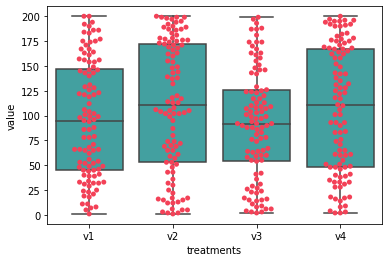

In [ ]:
#using boxplots to see the data distribution by each treatment.
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#34AFAF')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#F34157')
plt.show()

since we've randomly generated these values we'd expect our boxplots to look like this.

Assumptions ~

There are parametric assumptions that need to be met in order for the test to be considered valid

* *residuals* (experimental error) are approximately *normally distributed* (Shapiro-Wilks test)

* *homoscedasticity or homogeneity of variances* (variances are equal between treatment groups) (Levene’s or Bartlett’s)

* *observations are sampled independently from each other* (no relation in observations between the groups and within the groups) i.e., each subject should have only one response

* *the dependent variable should be continuous*. If the dependent variable is ordinal or rank, it is more likely to violate the assumptions of normality and homogeneity of variances.

the test ~

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['v1'], df['v2'], df['v3'], df['v4'])
print(fvalue, pvalue)

1.8983169325238929 0.12929125918949438


In [ ]:
# we can also get an ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),20884.46,3.0,1.898317,0.129291
Residual,1452206.78,396.0,NaN,NaN


Interpretation

The **p value** obtained from ANOVA analysis is insignificant (**p > 0.05**), and therefore, we conclude that there are **no significant differences among treatments**.

Note on F value: F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

From ANOVA analysis, we might get the conclusion that treatment differences are statistically significant, but ANOVA **does not** tell **which treatments are significantly different from each other**. To know the pairs of significant different treatments, we can perform **multiple pairwise comparison** (post hoc comparison) analysis.